In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
def normalize(arr):
    norm_arr = []
    minimum = np.nanmin(arr)
    maximum = np.nanmax(arr)
    diff_arr = maximum - minimum   
    for i in arr:
        temp = (i - minimum)/(maximum-minimum)
        norm_arr.append(temp)
    return norm_arr

c=2.99e5
lamb0 = 396.847
mu = 0.4760111410077789

def veltrans(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu

def wltrans(x):
    return ((((x/c)+1)*lamb0)-lamb0)

def gaussian(x, c1, mu1, sigma1):
    res = c1 * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) )
    return res

def gaussfit(params,selwl,sel):
    fit = gaussian( selwl, params )
    return (fit - sel)

def double_gaussian( x, c1, mu1, sigma1, c2, mu2, sigma2 ):
    res =   (c1 * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) )) \
          + (c2 * np.exp( - (x - mu2)**2.0 / (2.0 * sigma2**2.0) ))
    return res

In [33]:
filename_rh = '/Users/coletamburri/Desktop/fchroma_h20_24s.npz'
filename_dkist = '/Users/coletamburri/Desktop/DKISTobstest.npz'

In [34]:
rh_file = np.load(filename_rh)
dkist_file = np.load(filename_dkist)

In [35]:
rh_file.files

['wl_rh', 'int_rh']

In [36]:
dkist_file.files

['int_dkist', 'raw_dkist', 'wls', 'xs']

In [37]:
# index of kernel center for first frame (from "maxindices")
maxind = 1373

In [91]:
caiih_inds = np.where((rh_file['wl_rh']>396.4) & (rh_file['wl_rh']< 397.2))
dkist_wl = dkist_file['wls']
dkist_int = dkist_file['raw_dkist'][0,:,maxind]
rh_wl = rh_file['wl_rh'][caiih_inds]
rh_int = rh_file['int_rh'][caiih_inds]
rh_wl_shift = rh_wl-lamb0
dkist_wl_shift = dkist_wl-lamb0

In [92]:
rh_file['wl_rh']

array([2.27940000e+01, 2.31376297e+01, 2.34812593e+01, ...,
       2.90011950e+05, 2.91139936e+05, 2.92952933e+05])

In [93]:
dkist_intnorm = normalize(dkist_int)
rh_intnorm = normalize(rh_int)

Text(0.5, 1.0, 'DKIST/ViSP, RH from F-CHROMA Model 84 at 24s')

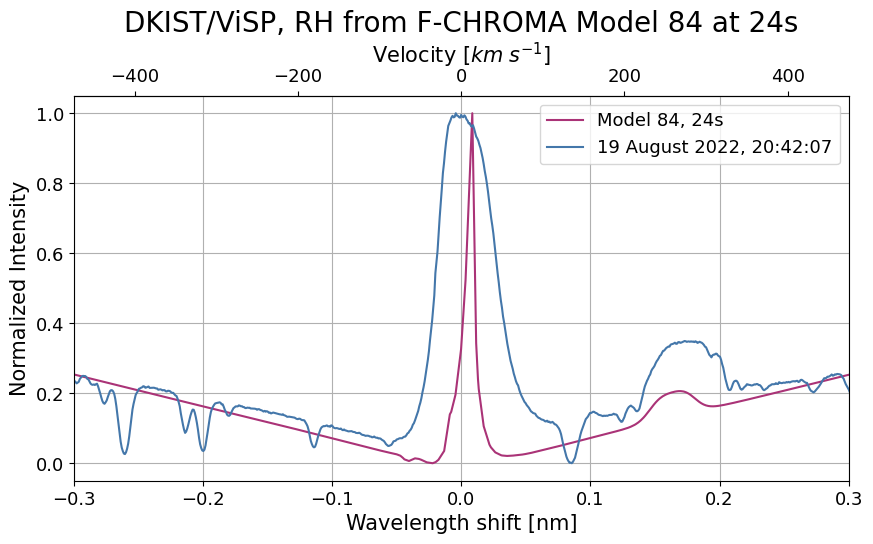

In [111]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(rh_wl_shift,rh_intnorm,label='Model 84, 24s',color='#AA3377')
ax.plot(dkist_wl_shift,dkist_intnorm,label='19 August 2022, 20:42:07',color='#4477AA')
ax.set_xlim([-0.3,0.3])
ax.legend(fontsize=13)
ax.grid()
ax.set_ylabel('Normalized Intensity',fontsize=15)
ax.set_xlabel('Wavelength shift [nm]',fontsize=15)
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$',fontsize=15)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
secaxx.tick_params(axis='x', labelsize=13)
ax.set_title('DKIST/ViSP, RH from F-CHROMA Model 84 at 24s',fontsize=20)

In [117]:
#now plot with double-gaussian fitting
filename_fit = '/Users/coletamburri/Desktop/fits2g.npz'
fit2g_file = np.load(filename_fit)
fit2g=fit2g_file['arr_0']

In [128]:
caII_low = 480
caII_high = 650
selwl = dkist_wl[caII_low:caII_high]
selwlshift=selwl-lamb0
gauss2fity = double_gaussian(selwl,fit2g[0],fit2g[1],fit2g[2],\
                             fit2g[3],fit2g[4],fit2g[5])

comp1fity = gaussian(selwl,fit2g[0],fit2g[1],fit2g[2])
comp2fity = gaussian(selwl,fit2g[3],fit2g[4],fit2g[5])

gauss2fitynorm = normalize(gauss2fity)
comp1fitynorm = (comp1fity - min(gauss2fity))/(max(gauss2fity)-min(gauss2fity))
comp2fitynorm = (comp2fity - min(gauss2fity))/(max(gauss2fity)-min(gauss2fity))


Text(0.5, 1.0, 'DKIST/ViSP, RH from F-CHROMA Model 84 at 24s')

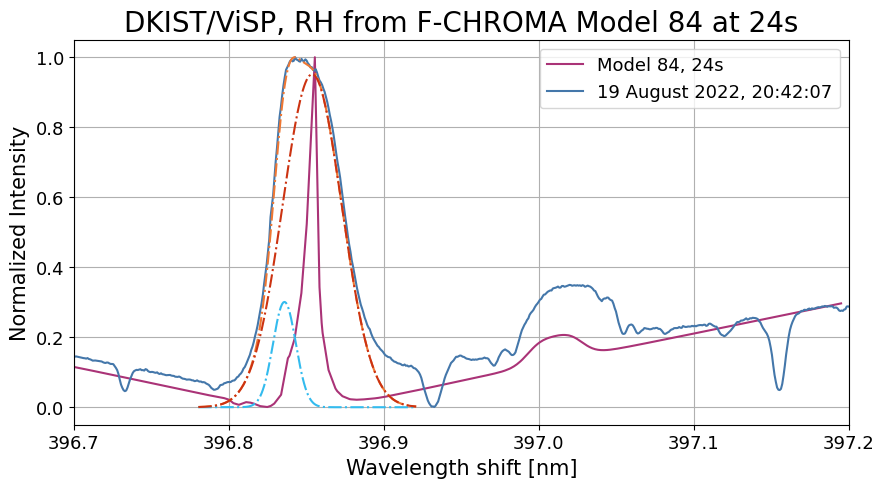

In [145]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(rh_wl,rh_intnorm,label='Model 84, 24s',color='#AA3377')
ax.plot(dkist_wl,dkist_intnorm,label='19 August 2022, 20:42:07',color='#4477AA')
ax.set_xlim([396.7,397.2])
ax.legend(fontsize=13)
ax.grid()
ax.set_ylabel('Normalized Intensity',fontsize=15)
ax.set_xlabel('Wavelength shift [nm]',fontsize=15)
#secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
#secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$',fontsize=15)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.plot(selwl,gauss2fitynorm,'-.',color='#EE7733',label='Model')
ax.plot(selwl,comp1fitynorm,'-.',color='#33BBEE',label='Component 1')
ax.plot(selwl,comp2fitynorm,'-.',color='#CC3311',label='Component 2')

#secaxx.tick_params(axis='x', labelsize=13)
ax.set_title('DKIST/ViSP, RH from F-CHROMA Model 84 at 24s',fontsize=20)